### Checkpoint 1: Data Cleaning 1

    Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.
    

In [168]:
# importing the necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [1019]:
# setting the precision for numerical displays
pd.options.display.float_format = '{:.2f}'.format

In [1020]:
# tweaking the plot size for better readability
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [360]:
companies = pd.read_csv('companies.csv', encoding = "ISO-8859-1")
# got encoding error initially used below link
#   - https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python
#   - http://pandaproject.net/docs/determining-the-encoding-of-a-csv-file.html

In [361]:
# peeking into companies
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [362]:
# same error was found to appear for rounds2.csv thereby used encoding = "ISO-8859-1"
rounds2 = pd.read_csv('rounds2.csv', encoding = "ISO-8859-1")

In [363]:
# peeking into rounds2
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


__How many unique companies are present in rounds2?__

In [707]:
# this should give the right number of unique records
# different case keys could be treated as different - standardizing case first and then finding unique keys
len(pd.unique(rounds2.company_permalink.str.lower()))

66370

__How many unique companies are present in companies?__

In [709]:
# number of unique companies in companies
# since permalink is a hyperlink unlikely to change over many years and would act as a primary key
len(pd.unique(companies.permalink.str.lower()))

66368

##### In the companies data frame, which column can be used as the unique key for each company? Write the name of the column

In [175]:
companies.permalink

0                                      /Organization/-Fame
1                                   /Organization/-Qounter
2                      /Organization/-The-One-Of-Them-Inc-
3                                    /Organization/0-6-Com
4                           /Organization/004-Technologies
                               ...                        
66363    /Organization/Zznode-Science-And-Technology-Co...
66364                            /Organization/Zzzzapp-Com
66365                                 /Organization/ÃEron
66366                               /Organization/ÃAsys-2
66367    /Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...
Name: permalink, Length: 66368, dtype: object

##### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

Answer is Y. Check the result of below command to know what are those companies:

In [176]:
# useful link - https://www.kdnuggets.com/2019/11/set-operations-applied-pandas-dataframes.html
rounds2[rounds2.company_permalink.str.lower().isin(companies.permalink.str.lower()) == False]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


##### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [369]:
# Before Merge let us take care of the case of permalink in companies.csv and 
# permalink in rounds2.csv
companies.permalink = companies.permalink.str.lower()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [370]:
# company-permalink in rounds2.csv
rounds2.company_permalink = rounds2.company_permalink.str.lower()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


> Now once columns are in same case so that values in them are not treated differently due to a difference in case
 we can go ahead and perform the merge. What kind of merge? 
 rounds2 would have permalink repeated for different values funding_round_permalink 
 Therefore - all possible data from companies should map to each record in rounds2.csv
 and we do not want any data loss to happen to rounds2.csv. rounds2.csv holds important information about funding raised by companies. So left join should be the preferred one. Because what if someone wants to analyse around those set of companies, for e.g find out what happened to them.. why their personal details are not avaialble , or may be later on add details. Left Join is the choice.

In [377]:
master_frame = pd.merge(rounds2, companies, how='left', left_on=['company_permalink'], right_on=['permalink'])

*let us check for company_permalink == '/organization/-qounter' because we can clearly see that is repeated twice with different case value in one of the above head operations.*

In [372]:
master_frame[master_frame.company_permalink == '/organization/-qounter']

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


*Now the other thing to note is that NaN values for cells which were empty. let us clean them using fillna for raised_amount_usd*

*__How many observations are present in the master_frame?__*

In [380]:
master_frame.shape

(114949, 16)

#### Cleaning the data - Missing treating values for raised_amount_usd

In [678]:
master_frame_temp = master_frame.loc[(master_frame.funding_round_type.isin(funding_types)) & ~master_frame.raised_amount_usd.isnull()]

In [702]:
master_frame_temp.shape

(80627, 16)

In [680]:
master_frame_temp.describe()

,raised_amount_usd
count,80627.00
mean,9347994.74
std,75629397.45
min,0.00
25%,400000.00
50%,2000000.00
75%,7975495.50
max,17600000000.00


In [681]:
master_frame_temp.raised_amount_usd.mode()

0   1000000.00
dtype: float64

In [599]:
# computing the % difference in mean and mode
(9347994.74/1000000.00)

9.34799474

Since the difference in mean and mode appears to be very much pronounced, ratio is not close to 1. Therefore for imputation of missing values let's go with median and not mean.

In [682]:
master_frame_temp.raised_amount_usd.median()

2000000.0

Another observation is that Median is not very close to mean and not even mode. There must be some outliers which are dragging mean to extreme values. In describe function output we can see that max is very large compared to 75%tile.

Lets us also see the boxplot for what is condidtion of outliers in this case

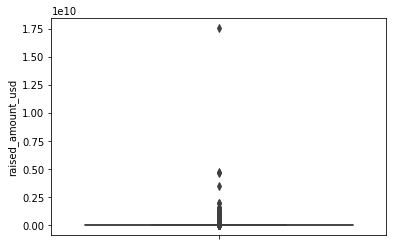

In [685]:
sns.boxplot(master_frame_temp.raised_amount_usd, orient='v')
plt.show()

Let us see some percentile values too to get an idea.

In [683]:
# computing the 85th percentile
master_frame_temp.quantile(q=0.85)

raised_amount_usd   14000000.00
Name: 0.85, dtype: float64

In [684]:
# checking the 99th percentile
master_frame_temp.quantile(q=0.99)

raised_amount_usd   100000000.00
Name: 0.99, dtype: float64

Now we have to select median after analysing the dataset that is devoid of outliers. Such a median value would be more representative of missing raised_amount_usd.

In [686]:
# truncating values greater than 85th percentile
mf_minus_outliers = master_frame_temp[master_frame_temp.raised_amount_usd < 14000000.00]

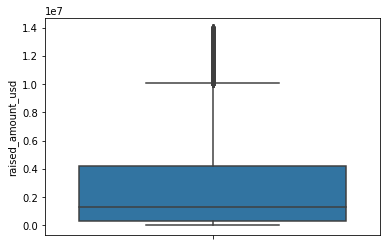

In [687]:
sns.boxplot(mf_minus_outliers.raised_amount_usd, orient='v')
plt.show()

In [688]:
print(mf_minus_outliers.median())

raised_amount_usd   1282886.00
dtype: float64


In [693]:
print(mf_minus_outliers.raised_amount_usd.mean())

2797303.5025254735


In [696]:
round(2797303.5025254735, 2)

2797303.5

__After removing significant outliers from the dataset we can see that we still have difference between median and mean. That is due to the fact that there are still outliers. In this case let's chose the median value to impute missing values and avoid any further outlier deduction to prevent information loss. Since we have alreay done for 85%tile__

In [698]:
master_frame_1 = master_frame
master_frame_1['raised_amount_usd'] = master_frame_1['raised_amount_usd'].fillna(2797303.5)

In [699]:
master_frame_1.raised_amount_usd

0        10000000.00
1         2797303.50
2          700000.00
3         3406878.00
4         2000000.00
             ...    
114944      41313.00
114945      32842.00
114946    2797303.50
114947      18192.00
114948      14851.00
Name: raised_amount_usd, Length: 114949, dtype: float64

In [705]:
# Result for below should be true as we have not dropped any rows.
master_frame_1.shape[0] == master_frame.shape[0]

True

In [737]:
print(round(100*(master_frame_1.isnull().sum()/len(df.index)), 2))

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        88.78
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.01
name                       0.01
homepage_url               6.50
category_list              3.62
status                     0.01
country_code               9.19
state_code                11.60
region                    10.77
city                      10.77
founded_at                21.75
dtype: float64


__Let us check the box-plot for our master_frame_1 after imputation and check if we need to treat any outliers__

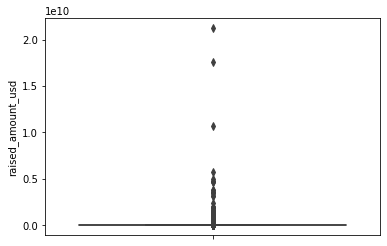

In [1021]:
sns.boxplot(master_frame_1.raised_amount_usd, orient='v')
plt.show()

In above box plot we can clearly see that they are extreme outliers. Let's run describe function again.

In [814]:
master_frame_1.describe()

,raised_amount_usd
count,114949.00
mean,9100063.35
std,104400842.11
min,0.00
25%,500000.00
50%,2797303.50
75%,5000000.00
max,21271935000.00


These outliers would be treated in checkpoint 2 when we would filter our records for 5 mn to 15 mn USD but at least we have a dataset with missing values imputed.

*__Now we have master_frame_1 ready with us checkpoint 1 ends here__*

### Checkpoint 2: Funding Type Analysis

*This is the first of the three goals of data analysis – investment type analysis.*

 

The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

    - Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
    
    - Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.

*We can categorise fundings in following order*  
1. {seed, angel} - level 1
2. {venture}  - level 2
3. {Private Equity}  - level 3

>Level 3 > Level 2 > Level 1

In [381]:
pd.unique(master_frame.funding_round_type)

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

##### Will use below list to filter master_frame

In [396]:
funding_types = ['seed','angel','venture','private_equity']

In [759]:
master_frame_2 = master_frame_1.loc[(master_frame.funding_round_type.isin(funding_types))]

In [760]:
master_frame_2.loc[(master_frame.funding_round_type.isin(funding_types))].shape

(94397, 16)

In [761]:
df = master_frame_2.loc[:,['funding_round_type','raised_amount_usd']]

>*Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1*

In [762]:
df.groupby('funding_round_type').mean().round()

,raised_amount_usd
funding_round_type,
angel,1331002.00
private_equity,62539035.00
seed,1190866.00
venture,10899499.00


>Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them

In [1068]:
one_million = 1000000
x = df.groupby('funding_round_type').mean().round()/one_million
x[x.raised_amount_usd.apply(lambda x: True if x>=5 and x<=15 else False)]

,raised_amount_usd
funding_round_type,
venture,10.90


In [1069]:
x.head()

,raised_amount_usd
funding_round_type,
angel,1.33
private_equity,62.54
seed,1.19
venture,10.90


*Only Venture type is the one which fullfills the constraint of 5 to 15 million USD*

In [192]:
chosen_investment_type = 'venture'

In [717]:
master_frame_2 = master_frame_2[master_frame_2.funding_round_type==chosen_investment_type]

__Also applying the constraint for 5 to 15 million USD inclusive__

In [820]:
master_frame_2 = master_frame_2[(master_frame_2.raised_amount_usd<=15*one_million) & (master_frame_2.raised_amount_usd>=5*one_million)]

In [ ]:
Let us alos check the box-plot 

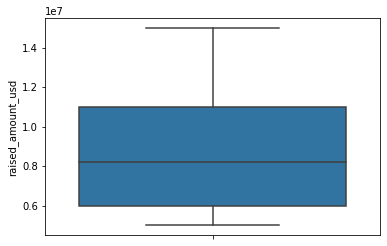

In [1022]:
sns.boxplot(master_frame_2.raised_amount_usd, orient='v')
plt.show()

__Now master_frame_2 is ready with data that contains both imputed missing values for investment amount and venture funding type__  
__CHECKPOINT 2 Ends here__

### Checkpoint 3: Country Analysis

This is the second goal of analysis — country analysis.

 

Now that you know the type of investment suited for Spark Funds, let's narrow down the countries.

 

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

 

1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [435]:
pd.unique(master_frame_2.country_code)

array(['IND', nan, 'CHN', 'CAN', 'USA', 'GBR', 'FRA', 'ROM', 'KOR', 'IRL',
       'SWE', 'SGP', 'NLD', 'RUS', 'BEL', 'ESP', 'HUN', 'JPN', 'DEU',
       'ITA', 'HKG', 'BRA', 'FIN', 'CHE', 'PRT', 'SVN', 'THA', 'DNK',
       'TWN', 'ISR', 'NOR', 'LTU', 'ISL', 'MEX', 'AUS', 'NZL', 'AUT',
       'ARG', 'PHL', 'MNE', 'MYS', 'TUR', 'POL', 'LVA', 'GGY', 'EST',
       'LBN', 'GRC', 'IDN', 'CYP', 'SVK', 'ARE', 'EGY', 'ARM', 'ZAF',
       'TUN', 'KEN', 'COL', 'CZE', 'CMR', 'PRI', 'CYM', 'PER', 'ECU',
       'CHL', 'NGA', 'VNM', 'URY', 'PAK', 'HRV', 'LUX', 'UKR', 'BMU',
       'MUS', 'BGR', 'TTO', 'PAN', 'MMR', 'JOR', 'KAZ', 'MAR', 'LIE',
       'GTM', 'SAU', 'TAN', 'KNA', 'SEN', 'MLT', 'MCO', 'BAH', 'GHA',
       'KWT', 'UGA', 'LAO', 'BGD', 'BWA', 'MAF', 'GIB'], dtype=object)

##### https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

##### we can get below code in javascript to scrapt the data. I used Firefox.

1. Countries where English is a de facto official language
2. Countries where English is a de jure and de facto official language
 
>   tables = document.getElementsByClassName('wikitable');  
    countries = []  
    for (var x = 1; x < table[0].rows.length; x++)  
      {  
        countries.push(tables[0].rows[x].cells[2].innerText)  
      }  
    for (var x = 1; x < table[1].rows.length; x++)  
      {  
        countries.push(tables[1].rows[x].cells[2].innerText)  
      }  
    countries  

*Copy paste result, Using column selection mode for editing and some good find replace tricks we can get below*  
>"AUS","NZL","GBR","USA","ATG","BHS","BRB","BLZ","BWA","BDI", "CMR", "CAN", "COK", "DMA", "SWZ", "FJI", "GMB", "GHA", "GRD", "GUY", "IND", "IRL", "JAM", "KEN", "KIR", "LSO", "LBR", "MWI", "MLT", "MHL", "MUS", "FSM", "NAM", "NRU", "NGA"
 "NIU", "PAK", "PLW", "PNG", "PHL", "RWA", "KNA", "LCA", "VCT", "WSM", "SYC", "SLE", "SGP", "SLB", "ZAF", "SSD", "SDN", "TZA", "TON", "TTO", "TUV", "UGA", "VUT", "ZMB", "ZWE"

In [197]:
eng_speaking_countries = ["AUS","NZL","GBR","USA","ATG","BHS","BRB","BLZ","BWA","BDI", "CMR", "CAN", "COK", "DMA", "SWZ", "FJI", "GMB", "GHA", "GRD", "GUY", "IND", "IRL", "JAM", "KEN", "KIR", "LSO", "LBR", "MWI", "MLT", "MHL", "MUS", "FSM", "NAM", "NRU", "NGA"
 "NIU", "PAK", "PLW", "PNG", "PHL", "RWA", "KNA", "LCA", "VCT", "WSM", "SYC", "SLE", "SGP", "SLB", "ZAF", "SSD", "SDN", "TZA", "TON", "TTO", "TUV", "UGA", "VUT", "ZMB", "ZWE"]

In [198]:
eng_speaking_countries

['AUS',
 'NZL',
 'GBR',
 'USA',
 'ATG',
 'BHS',
 'BRB',
 'BLZ',
 'BWA',
 'BDI',
 'CMR',
 'CAN',
 'COK',
 'DMA',
 'SWZ',
 'FJI',
 'GMB',
 'GHA',
 'GRD',
 'GUY',
 'IND',
 'IRL',
 'JAM',
 'KEN',
 'KIR',
 'LSO',
 'LBR',
 'MWI',
 'MLT',
 'MHL',
 'MUS',
 'FSM',
 'NAM',
 'NRU',
 'NGANIU',
 'PAK',
 'PLW',
 'PNG',
 'PHL',
 'RWA',
 'KNA',
 'LCA',
 'VCT',
 'WSM',
 'SYC',
 'SLE',
 'SGP',
 'SLB',
 'ZAF',
 'SSD',
 'SDN',
 'TZA',
 'TON',
 'TTO',
 'TUV',
 'UGA',
 'VUT',
 'ZMB',
 'ZWE']

>Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [ ]:
master_frame_2[master_frame_2.country_code]

In [860]:
top9 = master_frame_2.loc[:, ['country_code','raised_amount_usd']].groupby('country_code').sum().round().sort_values(by='raised_amount_usd',ascending=False).head(9)

In [861]:
top9

,raised_amount_usd
country_code,
USA,112562637512.00
GBR,5726936263.00
CHN,5156510507.00
CAN,3834922744.00
IND,3065543602.00
ISR,2989295147.00
FRA,2143939776.00
DEU,1797007570.00
SWE,733759745.00


In [862]:
print(top9.columns)
print(top9.index)

Index(['raised_amount_usd'], dtype='object')
Index(['USA', 'GBR', 'CHN', 'CAN', 'IND', 'ISR', 'FRA', 'DEU', 'SWE'], dtype='object', name='country_code')


In [863]:
y = top9[top9.index.isin(eng_speaking_countries)]

In [864]:
y

,raised_amount_usd
country_code,
USA,112562637512.00
GBR,5726936263.00
CAN,3834922744.00
IND,3065543602.00


In [865]:
country_1, country_2, country_3 = 'USA', 'GBR', 'CAN'

__Below is just an additional check to understand if the above three are really the countries where where most other investors are investing__

In [857]:
df = master_frame_2.loc[:, ['company_permalink','raised_amount_usd','country_code','primary_sector']]
countries_by_no_of_investors = pd.pivot_table(df, index=['country_code'], values=['company_permalink'], aggfunc=len).sort_values(by='company_permalink', ascending=False)
countries_by_no_of_investors

,company_permalink
country_code,
USA,12635
GBR,664
CHN,550
CAN,449
IND,342
...,...
ROM,1
LTU,1
EGY,1


Now checking which ones are the top english speaking countries

In [859]:
countries_by_no_of_investors[countries_by_no_of_investors.index.isin(eng_speaking_countries)]

,company_permalink
country_code,
USA,12635
GBR,664
CAN,449
IND,342
SGP,76
AUS,71
IRL,62
NZL,16
ZAF,6


### Checkpoint 4: Sector Analysis 1

This is the third goal of analysis — sector analysis.

 

When we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.

 

Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

 

You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

    Extract the primary sector of each category list from the category_list column

    Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

Expected Results: Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).

In [824]:
mappings = pd.read_csv('mapping.csv')

In [826]:
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


We can see that we have category_list=NaN mapped to as main_sector=Blanks.  
Therefore we should ensure that primary_sector also have NaN which would be helpful during merge.

In [827]:
master_frame_2.category_list.apply(lambda x: np.nan if x is np.nan else str(x).split('|')[0] ).head(50)

0                       Media
12                  Analytics
21         Internet Marketing
22                       Apps
46           Local Businesses
50                  Cosmetics
52                      Games
99                        NaN
100                  Internet
103         Service Providers
110             Manufacturing
111             Manufacturing
112             Manufacturing
113             Manufacturing
114             Manufacturing
133                       NaN
134                  Software
140                 Education
141                 Education
145          Baby Accessories
148                   Finance
152          Clean Technology
181                       NaN
191                E-Commerce
211                      News
216                      News
227                E-Commerce
229                  Big Data
239             Biotechnology
249             Biotechnology
252             Biotechnology
254             Biotechnology
290           Cloud Computing
296       

In [828]:
master_frame_2['primary_sector'] =  master_frame_2.category_list.apply(lambda x: np.nan if x is np.nan else str(x).split('|')[0])

In [830]:
master_frame_2.primary_sector.head(10)

0                   Media
12              Analytics
21     Internet Marketing
22                   Apps
46       Local Businesses
50              Cosmetics
52                  Games
99                    NaN
100              Internet
103     Service Providers
Name: primary_sector, dtype: object

##### Now let's deal with the mappings table. Each value of 1 for a particular column indicates that column is main_sector for that category.    
##### Let's add a new column which holds the value of main_sector rather than this complex mechanism. 
##### It would be easier to merge with master_frame

In [831]:
mappings['main_sector'] = mappings.apply(lambda x: x.index[x==1].values[0], axis=1)

In [832]:
mappings_2 = mappings.loc[:,['category_list','main_sector']]

In [833]:
mappings_2

,category_list,main_sector
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
...,...,...
683,Wholesale,Others
684,Wine And Spirits,Entertainment
685,Wireless,Entertainment
686,Women,Others


#### Assuming we only want to focus on sectors which are in mappings.csv thereyby affording the lose to rounds2.csv on merge with mappings.csv, lets do an inner join

In [876]:
master_frame_3 = pd.merge(master_frame_2, mappings_2, how='inner', left_on=['primary_sector'], right_on=['category_list'])

In [877]:
master_frame_3

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment
3,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Media,Entertainment
4,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,NaN,07-01-2002,13439178.00,/organization/basel-switzerland,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,Media,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16042,/organization/wishabi,/funding-round/b4252e94f10c55ff6ed566ef813f4d53,venture,B,05-09-2013,15000000.00,/organization/wishabi,Wishabi,http://www.wishabi.com,Comparison Shopping|Printing|Software,operating,CAN,ON,Toronto,Toronto,08-01-2008,Comparison Shopping,Comparison Shopping,"News, Search and Messaging"
16043,/organization/yapta,/funding-round/2bef2981d0db9747630882cc91e42ba5,venture,NaN,20-07-2011,5000000.00,/organization/yapta,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,Tracking,Tracking,Others
16044,/organization/yoga-works,/funding-round/8092347fd1f3c15d711d89351154413f,venture,B,31-08-2007,13000000.00,/organization/yoga-works,Yoga Works,http://www.yogaworks.com,Exercise|Health and Wellness,acquired,USA,CA,Los Angeles,Santa Monica,01-01-1987,Exercise,Exercise,Health
16045,/organization/your-md,/funding-round/b71a34813b3c056fe24777638f560e5b,seed,NaN,01-07-2015,5000000.00,/organization/your-md,Your.MD,http://www.your.md,mHealth,operating,NOR,12,Oslo,Oslo,01-02-2013,mHealth,mHealth,Health


__*Since category_list_y came from mappings and will hold same value as primary_sector, let's drop it*__

In [878]:
master_frame_3 = master_frame_3.drop(['category_list_y'], axis=1)

__also lets rename category_list_x to category_list__

In [879]:
master_frame_3 = master_frame_3.rename(columns={'category_list_x':'category_list'})

In [880]:
D1 = master_frame_3.loc[(master_frame_3.country_code==country_1) 
                 & (master_frame_3.raised_amount_usd/1000000 <= 15)
                 & (master_frame_3.raised_amount_usd/1000000 >= 5)
                & (master_frame_3.funding_round_type==chosen_investment_type)]

In [886]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
3,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment
5,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.00,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment
6,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.00,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment
7,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.00,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment
8,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.00,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment


In [882]:
D2 = master_frame_3.loc[(master_frame_3.country_code==country_2) 
                 & (master_frame_3.raised_amount_usd/1000000 <= 15)
                 & (master_frame_3.raised_amount_usd/1000000 >= 5)
                & (master_frame_3.funding_round_type==chosen_investment_type)]

In [887]:
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
92,/organization/flypay,/funding-round/b6854cc7fc06ea76843ec89801f172f2,venture,A,16-07-2015,10700000.00,/organization/flypay,Flypay,http://www.flypay.co.uk,Apps|Customer Service|Restaurants,operating,GBR,H9,London,London,26-02-2013,Apps,"News, Search and Messaging"
120,/organization/kaazing,/funding-round/0f43f5fbe8b360281ba135c717e47e0d,venture,NaN,17-04-2013,15000000.00,/organization/kaazing,Kaazing,http://www.kaazing.com,Apps|Data Integration|Enterprise Software|Info...,operating,GBR,H9,London,London,01-05-2007,Apps,"News, Search and Messaging"
125,/organization/mindshapes,/funding-round/ad81de5d230ca4ef1876e1c71bf097e3,venture,A,01-11-2011,5000000.00,/organization/mindshapes,Mindshapes,http://mindshapes.com,Apps|Education|Games|Kids|Textbooks|Virtual Wo...,operating,GBR,H9,London,London,01-01-2010,Apps,"News, Search and Messaging"


In [884]:
D3 = master_frame_3.loc[(master_frame_3.country_code==country_3) 
                 & (master_frame_3.raised_amount_usd/1000000 <= 15)
                 & (master_frame_3.raised_amount_usd/1000000 >= 5)
                & (master_frame_3.funding_round_type==chosen_investment_type)]

In [888]:
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
33,/organization/500px,/funding-round/344b1e2b60ff76f4548c69ea7c04901f,venture,A,07-08-2013,8800000.00,/organization/500px,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,Apps,"News, Search and Messaging"
34,/organization/500px,/funding-round/36b2c6975d20b602b5d9ea9724e383ea,venture,B,21-07-2015,13000000.00,/organization/500px,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,Apps,"News, Search and Messaging"
150,/organization/polar-me,/funding-round/8306cc4e0122a91a0803cb5755be62e0,venture,NaN,23-01-2012,6000000.00,/organization/polar-me,Polar,http://www.polar.me,Apps|Mobile|Software,operating,CAN,ON,Toronto,Toronto,01-11-2007,Apps,"News, Search and Messaging"
289,/organization/execution-labs,/funding-round/2e2a592b08cdbd58d39f656d57eccd7b,venture,A,10-11-2014,5300000.00,/organization/execution-labs,Execution Labs,http://executionlabs.com,Games|Incubators,operating,CAN,QC,Quebec City,Quebec,01-01-2012,Games,Entertainment
315,/organization/gamerizon-studio,/funding-round/6d7257c70e677a29b56cc9b0d1ba03ec,venture,NaN,15-09-2011,5000000.00,/organization/gamerizon-studio,Gamerizon Studio,http://gamerizon.com,Games,closed,CAN,QC,Montreal,MontrÃ©al,NaN,Games,Entertainment


#### creating summary metrics for D1 - later on merge with D1 itself

In [889]:
D1_summary_metric = D1.loc[:,['funding_round_permalink','main_sector']].groupby('main_sector').count()

In [890]:
D1_summary_metric=D1_summary_metric.rename(columns={'funding_round_permalink':'total_number'})

In [891]:
D1_summary_metric['total_amount_mn'] = D1.loc[:,['main_sector','raised_amount_usd']].groupby('main_sector').sum()/1000000.0

In [892]:
D1_summary_metric

,total_number,total_amount_mn
main_sector,,
Automotive & Sports,167,1454.10
Blanks,86,764.76
Cleantech / Semiconductors,2297,21181.00
Entertainment,580,5000.21
Health,908,8200.86
Manufacturing,799,7258.55
"News, Search and Messaging",1563,13796.82
Others,2923,26089.28
"Social, Finance, Analytics, Advertising",1912,16680.70


#### creating summary metrics for D2 - later on merge with D2 itself

In [893]:
D2_summary_metric = D2.loc[:,['funding_round_permalink','main_sector']].groupby('main_sector').count()

In [894]:
D2_summary_metric['total_amount_mn'] = D2.loc[:,['main_sector','raised_amount_usd']].groupby('main_sector').sum()/1000000.0

In [895]:
D2_summary_metric = D2_summary_metric.rename(columns={'funding_round_permalink':'total_number'})

In [896]:
D2_summary_metric

,total_number,total_amount_mn
main_sector,,
Automotive & Sports,16,167.05
Blanks,7,57.76
Cleantech / Semiconductors,127,1136.91
Entertainment,54,461.51
Health,24,214.54
Manufacturing,42,361.94
"News, Search and Messaging",73,615.75
Others,143,1249.12
"Social, Finance, Analytics, Advertising",98,821.89


In [897]:
D3_summary_metric = D3.loc[:,['funding_round_permalink','main_sector']].groupby('main_sector').count()

In [898]:
D3_summary_metric['total_amount_mn'] = D3.loc[:,['main_sector','raised_amount_usd']].groupby('main_sector').sum()/1000000.0

In [899]:
D3_summary_metric = D3_summary_metric.rename(columns={'funding_round_permalink':'total_number'})

In [900]:
D3_summary_metric

,total_number,total_amount_mn
main_sector,,
Automotive & Sports,2,15.00
Blanks,4,47.72
Cleantech / Semiconductors,112,1015.89
Entertainment,22,154.02
Health,20,162.15
Manufacturing,31,237.63
"News, Search and Messaging",46,420.12
Others,109,926.14
"Social, Finance, Analytics, Advertising",52,443.34


In [902]:
D1_1 = pd.merge(D1, D1_summary_metric, how='inner', on='main_sector')

In [904]:
D1_1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_number,total_amount_mn
0,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,580,5000.21
1,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.00,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,580,5000.21
2,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.00,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,580,5000.21
3,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.00,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,580,5000.21
4,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.00,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment,580,5000.21


In [905]:
D2_1 = pd.merge(D2, D2_summary_metric, how='inner', on='main_sector')

In [906]:
D2_1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_number,total_amount_mn
0,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,54,461.51
1,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,54,461.51
2,/organization/eutechnyx,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,A,13-05-2010,8800000.00,/organization/eutechnyx,Eutechnyx,http://press.eutechnyx.com,Games,operating,GBR,E5,Gateshead,Gateshead,01-01-1987,Games,Entertainment,54,461.51
3,/organization/mind-candy,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,B,01-06-2011,10000000.00,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,Games,Entertainment,54,461.51
4,/organization/mind-candy,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,A,23-11-2006,10860000.00,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,Games,Entertainment,54,461.51


In [907]:
D3_1 = pd.merge(D3, D3_summary_metric, how='inner', on='main_sector')

In [908]:
D3_1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_number,total_amount_mn
0,/organization/500px,/funding-round/344b1e2b60ff76f4548c69ea7c04901f,venture,A,07-08-2013,8800000.00,/organization/500px,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,Apps,"News, Search and Messaging",46,420.12
1,/organization/500px,/funding-round/36b2c6975d20b602b5d9ea9724e383ea,venture,B,21-07-2015,13000000.00,/organization/500px,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,Apps,"News, Search and Messaging",46,420.12
2,/organization/polar-me,/funding-round/8306cc4e0122a91a0803cb5755be62e0,venture,NaN,23-01-2012,6000000.00,/organization/polar-me,Polar,http://www.polar.me,Apps|Mobile|Software,operating,CAN,ON,Toronto,Toronto,01-11-2007,Apps,"News, Search and Messaging",46,420.12
3,/organization/waverider-communications,/funding-round/e3a5e5af0514515c6a8b5afbd6cfcbe3,venture,NaN,23-12-1999,10000000.00,/organization/waverider-communications,WaveRider Communications,NaN,Internet|Wireless,operating,CAN,ON,Toronto,Toronto,01-01-1987,Internet,"News, Search and Messaging",46,420.12
4,/organization/nowpublic,/funding-round/62db4d38f6afc26ab4de30aa1e35c569,venture,A,01-07-2007,10600000.00,/organization/nowpublic,NowPublic,http://www.nowpublic.com,News,acquired,CAN,BC,Vancouver,Vancouver,01-01-2005,News,"News, Search and Messaging",46,420.12


__Total number of Investments (count)__

In [909]:
D1_1.total_number.sum()

21753401

In [910]:
D2_1.total_number.sum()

57072

In [911]:
D3_1.total_number.sum()

31110

__Total amount of investment (USD)__

In [912]:
D1_1.total_amount_mn.sum().round()

194824336.0

In [913]:
D2_1.total_amount_mn.sum().round()

496855.0

In [914]:
D3_1.total_amount_mn.sum().round()

271327.0

__TopMost Sectors name (no. of investment-wise)__

In [915]:
D1_summary_metric.sort_values(by='total_number', ascending=False)

,total_number,total_amount_mn
main_sector,,
Others,2923,26089.28
Cleantech / Semiconductors,2297,21181.00
"Social, Finance, Analytics, Advertising",1912,16680.70
"News, Search and Messaging",1563,13796.82
Health,908,8200.86
Manufacturing,799,7258.55
Entertainment,580,5000.21
Automotive & Sports,167,1454.10
Blanks,86,764.76


In [916]:
D2_summary_metric.sort_values(by='total_number', ascending=False)

,total_number,total_amount_mn
main_sector,,
Others,143,1249.12
Cleantech / Semiconductors,127,1136.91
"Social, Finance, Analytics, Advertising",98,821.89
"News, Search and Messaging",73,615.75
Entertainment,54,461.51
Manufacturing,42,361.94
Health,24,214.54
Automotive & Sports,16,167.05
Blanks,7,57.76


In [917]:
D3_summary_metric.sort_values(by='total_number', ascending=False)

,total_number,total_amount_mn
main_sector,,
Cleantech / Semiconductors,112,1015.89
Others,109,926.14
"Social, Finance, Analytics, Advertising",52,443.34
"News, Search and Messaging",46,420.12
Manufacturing,31,237.63
Entertainment,22,154.02
Health,20,162.15
Blanks,4,47.72
Automotive & Sports,2,15.00


#### Finding companies recieveing highest investment for corresponding top sector and 2nd best sector

In [923]:
D1_1.loc[D1_1.main_sector=='Others'].sort_values(by='raised_amount_usd', ascending=False).head(1)['name']

7437    nCircle Network Security
Name: name, dtype: object

In [924]:
D1_1.loc[D1_1.main_sector=='Cleantech / Semiconductors'].sort_values(by='raised_amount_usd', ascending=False).head(1)['name']

11067    Sunverge Energy, Inc
Name: name, dtype: object

In [925]:
D2_1.loc[D2_1.main_sector=='Others'].sort_values(by='raised_amount_usd', ascending=False).head(1)['name']

144    EnvironmentIQ
Name: name, dtype: object

In [926]:
D2_1.loc[D2_1.main_sector=='Cleantech / Semiconductors'].sort_values(by='raised_amount_usd', ascending=False).head(1)['name']

421    Anadigm
Name: name, dtype: object

In [927]:
D3_1.loc[D3_1.main_sector=='Cleantech / Semiconductors'].sort_values(by='raised_amount_usd', ascending=False).head(1)['name']

226    Nexterra
Name: name, dtype: object

In [928]:
D3_1.loc[D3_1.main_sector=='Others'].sort_values(by='raised_amount_usd', ascending=False).head(1)['name']

179    QuickPlay Media
Name: name, dtype: object

### Checkpoint 6: Plots

As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following plots:

  1. A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

  2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

  3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

 

This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

#### Below are the various states available from master_frame till now
master_frame_1 - filled with median values for raised_amount_usd (all investment types all countries)  
master_frame_2 - contains only data for chosen funding types ( venture )  
master_frame_3 - is mapped to mappings.csv and contains main_sector

#### Below dataframes are available too:
top9 - holds the top 9 countries with highert number of investments  
{Di, Di_Summary_metric, Di_1}  where i goes from 1 to 3
- Di - corresponds to data for country with country_i, e.g D1 would have data for only country_1 (USA for i=1)  
- Di_Summary_metric holds the metric data for total number of investments and total amount of investment accross     various sectors  
- Di_1 includes the combinded data from Di and Di_Summary_metric

### Plot 1

##### Let us create a master frame which has only targeted funding types

In [936]:
df = master_frame_1[master_frame_1.funding_round_type.isin(funding_types)]

In [931]:
global_total_investment = master_frame_1.raised_amount_usd.sum()
global_total_investment

1046043182100.0

In [1051]:
# calcualting the fraction of total(investments) globally in angel, venture, seed and private equity
df_ft_1 = df.loc[:,['funding_round_type','raised_amount_usd']].groupby('funding_round_type').sum()/global_total_investment

In [1052]:
df_ft_2 = df.loc[:,['funding_round_type','raised_amount_usd']].groupby('funding_round_type').mean()

In [1053]:
df_ft_1 = df_ft_1.rename(columns={'raised_amount_usd':'global_fraction'})

In [1054]:
df_ft_2 = df_ft_2.rename(columns={'raised_amount_usd':'average_investment'})

In [1055]:
df_ft = pd.concat([df_ft_1, df_ft_2], axis=1)

In [1060]:
df_ft.reset_index(level = 0, inplace=True )

In [1063]:
df_ft

,index,funding_round_type,global_fraction,average_investment
0,0,angel,0.01,1331002.24
1,1,private_equity,0.14,62539035.02
2,2,seed,0.03,1190866.26
3,3,venture,0.58,10899499.35


    Let us convert the average investment into millions to have a better idea

In [1064]:
df_ft['average_investment_mn']=df_ft['average_investment'].apply(lambda x: x/one_million)

In [1065]:
df_ft

,index,funding_round_type,global_fraction,average_investment,average_investment_mn
0,0,angel,0.01,1331002.24,1.33
1,1,private_equity,0.14,62539035.02,62.54
2,2,seed,0.03,1190866.26,1.19
3,3,venture,0.58,10899499.35,10.90


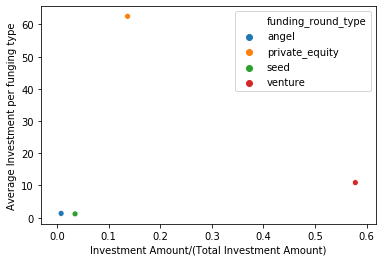

In [1080]:
ax = sns.scatterplot(data=df_ft, x='global_fraction', y='average_investment_mn', hue='funding_round_type')
ax.set(xlabel = 'Investment Amount/(Total Investment Amount)', ylabel='Average Investment per funging type')
plt.show()

We can see the majority of investments contribution to total investments is happening from venture type and average investment lies between the range of 5 to 15 million USD as well. All others do not fullfil the criteria

### Plot 2

In [948]:
top9

,raised_amount_usd
country_code,
USA,112562637512.00
GBR,5726936263.00
CHN,5156510507.00
CAN,3834922744.00
IND,3065543602.00
ISR,2989295147.00
FRA,2143939776.00
DEU,1797007570.00
SWE,733759745.00


In [953]:
top9_df = top9
top9_df.reset_index(level=0, inplace=True)

In [954]:
top9_df

,index,country_code,raised_amount_usd
0,0,USA,112562637512.00
1,1,GBR,5726936263.00
2,2,CHN,5156510507.00
3,3,CAN,3834922744.00
4,4,IND,3065543602.00
5,5,ISR,2989295147.00
6,6,FRA,2143939776.00
7,7,DEU,1797007570.00
8,8,SWE,733759745.00


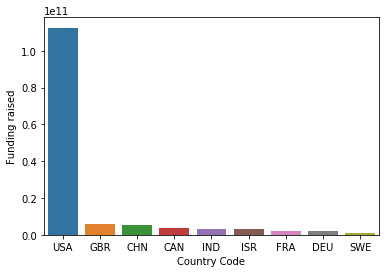

In [1078]:
ax = sns.barplot(data=top9_df, x='country_code', y='raised_amount_usd')
ax.set(xlabel = 'Country Code', ylabel='Funding raised')
plt.show()

### Plot 3

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). As we can see the top3 sectors consists of *Others*, *Cleantech / Semiconductors*, *Social, Finance, Analytics, Advertising*  
So let us plot a graph for sectors - others, Cleantech / Semiconductors, Social, Finance, Analytics, Advertising as x - axis, and number of investments as Y -axis  
D1, D2, D3 and their derived matrices are for a particular chosen investment type.

In [959]:
d1_df = D1_summary_metric
d2_df = D2_summary_metric
d3_df = D3_summary_metric

In [960]:
d1_df.reset_index(level=0, inplace=True)
d2_df.reset_index(level=0, inplace=True)
d3_df.reset_index(level=0, inplace=True)

In [964]:
d1_df = d1_df[d1_df.main_sector.isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]
d2_df = d2_df[d2_df.main_sector.isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]
d3_df = d3_df[d3_df.main_sector.isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]



In [984]:
d1_df['country_code'] = country_1

/Users/sourabhdhingra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [985]:
d1_df

,main_sector,total_number,total_amount_mn,country_code
2,Cleantech / Semiconductors,2297,21181.00,USA
7,Others,2923,26089.28,USA
8,"Social, Finance, Analytics, Advertising",1912,16680.70,USA


In [988]:
d2_df['country_code'] = country_2

/Users/sourabhdhingra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [989]:
d2_df

,main_sector,total_number,total_amount_mn,country_code
2,Cleantech / Semiconductors,127,1136.91,GBR
7,Others,143,1249.12,GBR
8,"Social, Finance, Analytics, Advertising",98,821.89,GBR


In [991]:
d3_df['country_code'] = country_3

/Users/sourabhdhingra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [992]:
d3_df

,main_sector,total_number,total_amount_mn,country_code
2,Cleantech / Semiconductors,112,1015.89,CAN
7,Others,109,926.14,CAN
8,"Social, Finance, Analytics, Advertising",52,443.34,CAN


In [996]:
top3_sec_cntry = pd.concat([d1_df, d2_df, d3_df])

In [997]:
top3_sec_cntry

,main_sector,total_number,total_amount_mn,country_code
2,Cleantech / Semiconductors,2297,21181.00,USA
7,Others,2923,26089.28,USA
8,"Social, Finance, Analytics, Advertising",1912,16680.70,USA
2,Cleantech / Semiconductors,127,1136.91,GBR
7,Others,143,1249.12,GBR
8,"Social, Finance, Analytics, Advertising",98,821.89,GBR
2,Cleantech / Semiconductors,112,1015.89,CAN
7,Others,109,926.14,CAN
8,"Social, Finance, Analytics, Advertising",52,443.34,CAN


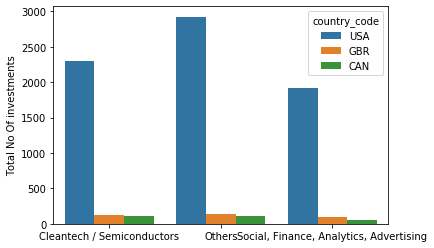

In [1081]:
ax = sns.barplot(x='main_sector', y='total_number', data=top3_sec_cntry, hue='country_code')
ax.set(xlabel=None, ylabel='Total No Of investments')
plt.show()